## 자산 포트폴리오 분석 

### 분석 내용 
- 무작위 할당 
- 샤프 비율 계산
- 수익률, 위험률 계산 
- 개인 주식 종목과 포트폴리오에 대한 누적 수익률 

### 포트폴리오 란? 
- 여기서 말하는 포트폴리오는 간단히 말해 채권(고정소득증권)과 같은 금융 투자의 집합체 이다.
- 포트폴리오에서는 현금이나 현금성 자산의 뮤추얼 펀드, 상장 지수펀드가 포함될 수도 있다.
    - 뮤추얼 펀드 - 다수 개인 투자자에게서 자본을 끌어모아 주식이나 채권 등의 투자 자산을 매수 및 운용하는 상품
    - 상장 지수 펀드(ETF) - 특정 지수를 추종하는 인덱스 펀드를 거래소에 상장시켜 주식처럼 거래할 수 있도록 만든 펀드 
- 주요 쟁점은 고객의 자산으로 어디에 투자 할지 할당하는 것이다. 그래서 모든 것은 고객의 데이터를 들여다 봐야 분석이 가능하다. 

### 자산 유형 소개 

#### 주식 
- 주식은 회사의 특정 비율에 대한 소유권을 나타낸다. 주식은 단순히 소유주가 얼마나 많은 주식을 보유하고 있는지에 따라 주어진 회사의 일부 주식에 대한 권리를 소유자에게 부여한다. 
- 주식은 유동성 자산이다. 
- 주식은 한국을 기준으로 KRX(한국 거래소)에서 유가증권시장(Kospi), Kosdaq 등의 개설, 운영, 증권 매매를 관할 한다.

#### 고정 수익 증권(채권)
- 고정수익증권(채권)은 일반적으로 정부나 기업에서 발행하고 투자자가 차용인(빌려주는 사람)에게 헌 대출을 나타내는 고정 수입 증권 이다. 따라서 채권은 투자자에게 정해진 고정 이자율을 지불한다.
- 예를 들어 한국 국채는 연 3퍼센트를 지불하는데, 이 투자는 대체적으로 안전하기 떄문에 수익이 보장된다. 그래서 채권은 기본적으로 회사와 정부에서 자본을 조달하고 투자자에게 증서를 준다.
- 일반적으로 채권은 주식에 비해 덜 위험하다.(비교적 안전 자산에 속한다.)

#### 상장 지수 펀드(ETF)
- ETF는 유가 증권 그룹을 포함하며 한국을 기준으로 KODEX 200과 같은 추적 및 지수를 포한하는 증권 유형이다.
- ETF는 기본적으로 무퓨얼 펀드(주식 발행을 통해 투자자를 모집하여 형성된 투자자금을 전분 투자사가 운영햐도록 맡김)와 비슷하다. 하지만 ETF는 시장성이 있는 증권이기 때문에 다른 주식들과 유사하게 거래소에서 거래가 가능하다.
- ETF는 일반적으로 관리 수수료가 매우 낮고 리스크 분산을 위한 좋은 장치로도 쓰인다.

### 데이터 불러오기 및 데이터 비쥬얼라이제이션

In [28]:
# 라이브러리 및 모듈 불러오기 
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# 데이터 불러오기 - 코스피 데이터 
kospi_df = pd.read_csv("data/kospi_stocks.csv")
kospi_df = kospi_df.sort_values(by=["Date"])
kospi_df = kospi_df.reset_index(drop=True)
kospi_df

Date    KOSPI  SAMSUNG  HYUNDAI_CAR    KIA  KORMAR   NAVER  KAKAO  \
0    2019-01-02  2010.00    38750       114000  32800   70000  118000  20400   
1    2019-01-03  1993.70    37600       116500  32850   69600  122000  20500   
2    2019-01-04  2010.25    37450       119500  34850   70100  125500  20700   
3    2019-01-07  2037.10    38750       120500  34200   70900  131500  20600   
4    2019-01-08  2025.27    38100       119500  33800   68400  130000  19980   
..          ...      ...      ...          ...    ...     ...     ...    ...   
980  2022-12-23  2313.69    58100       157000  62700   42400  178000  53400   
981  2022-12-26  2317.14    57900       158000  63700   41900  178500  53600   
982  2022-12-27  2332.79    58100       158000  64100   44100  181000  54400   
983  2022-12-28  2280.45    56600       154000  60900   43200  180000  53600   
984  2022-12-29  2236.40    55300       151000  59300   42600  177500  53100   

     THE_HYUNDAI  
0          87700  
1          87500  
2          88200  
3          88400  
4          87100  
..           ...  
980        58900  
981        59000  
982        59400  
983        61100  
984        59000  

[985 rows x 9 columns]

In [7]:
# 데이터 불러오기 - 코스닥 데이터 
kosdaq_df = pd.read_csv("data/kosdaq_stocks.csv")
kosdaq_df = kosdaq_df.sort_values(by=["Date"])
kosdaq_df = kosdaq_df.reset_index(drop=True)
kosdaq_df

Date  KOSDAQ  ECHOPRO_BM  HANA_METERIALS  SM_ENTER  JYP_ENTER  \
0    2019-03-06  746.70       16927           18300     46950      30000   
1    2019-03-07  736.83       17247           18550     44900      29350   
2    2019-03-08  735.97       17223           18150     45300      30100   
3    2019-03-11  739.09       17050           18250     40550      31200   
4    2019-03-12  754.76       16557           19000     39050      29950   
..          ...     ...         ...             ...       ...        ...   
939  2022-12-23  691.25       97000           33100     77100      66900   
940  2022-12-26  694.68       97300           34800     79100      67300   
941  2022-12-27  704.19       97900           34850     79300      68200   
942  2022-12-28  692.37       92200           33350     76000      66900   
943  2022-12-29  679.29       92100           32700     76700      67800   

     PERARLABYSS  SEOUL_SMC  
0         166800      24550  
1         169300      22150  
2         170300      22050  
3         182300      21750  
4         184100      22250  
..           ...        ...  
939        41900      10900  
940        43400      11050  
941        44400      11100  
942        43000      10500  
943        41950      10100  

[944 rows x 8 columns]

#### 시각화  - 일반 데이터 & 정규화 데이터 

In [2]:
# 시각화 함수화 
def show_plot(df, fig_title):     # 데이터프렝림과 타이을을 받고 
    df.plot(x="Date", figsize=(15, 7), linewidth=3, title=fig_title) 
    plt.grid()
    plt.show()

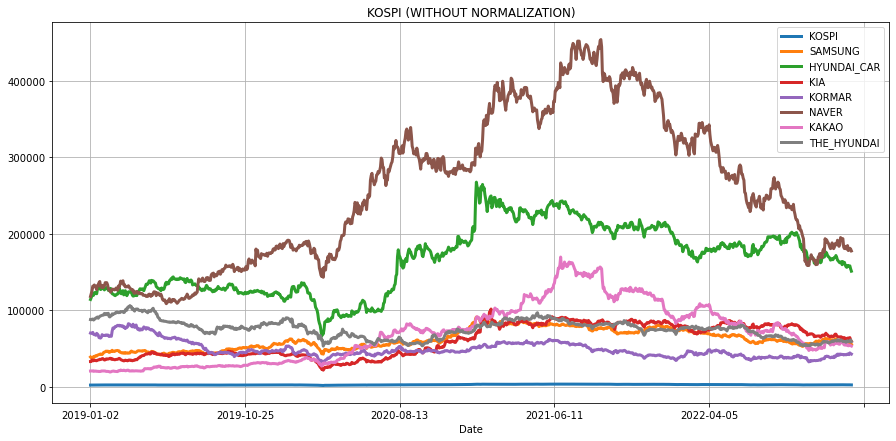

In [8]:
# 코스피 데이터 - 정규화 X
show_plot(df=kospi_df, fig_title="KOSPI (WITHOUT NORMALIZATION)")

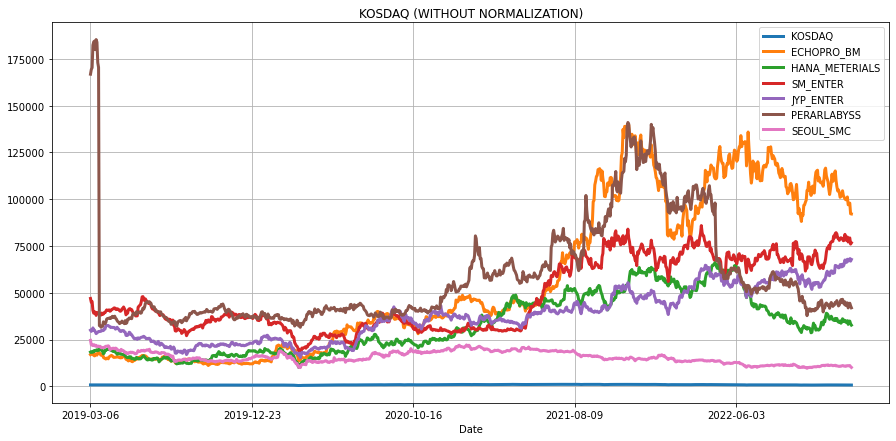

In [9]:
# 코스닥 데이터 - 정규화 X
show_plot(df=kosdaq_df, fig_title="KOSDAQ (WITHOUT NORMALIZATION)")

In [10]:
# 정규화 함수 설정
def normalize(df):
    x = df.copy()             # 데이터프레임 복사 
    for i in x.columns[1:]:   # 첫 번째 컬럼을 제외한 나머지 컬럼 기준 데이터프레임을 기준으로 반복문 작성
        x[i] = x[i]/x[i][0]   # 정규화 계산 - 전체값 / 초기값
    return x

In [11]:
# 코스피 지수 - 정규화 
normalize(kospi_df)

Date     KOSPI   SAMSUNG  HYUNDAI_CAR       KIA    KORMAR  \
0    2019-01-02  1.000000  1.000000     1.000000  1.000000  1.000000   
1    2019-01-03  0.991891  0.970323     1.021930  1.001524  0.994286   
2    2019-01-04  1.000124  0.966452     1.048246  1.062500  1.001429   
3    2019-01-07  1.013483  1.000000     1.057018  1.042683  1.012857   
4    2019-01-08  1.007597  0.983226     1.048246  1.030488  0.977143   
..          ...       ...       ...          ...       ...       ...   
980  2022-12-23  1.151090  1.499355     1.377193  1.911585  0.605714   
981  2022-12-26  1.152806  1.494194     1.385965  1.942073  0.598571   
982  2022-12-27  1.160592  1.499355     1.385965  1.954268  0.630000   
983  2022-12-28  1.134552  1.460645     1.350877  1.856707  0.617143   
984  2022-12-29  1.112637  1.427097     1.324561  1.807927  0.608571   

        NAVER     KAKAO  THE_HYUNDAI  
0    1.000000  1.000000     1.000000  
1    1.033898  1.004902     0.997719  
2    1.063559  1.014706     1.005701  
3    1.114407  1.009804     1.007982  
4    1.101695  0.979412     0.993158  
..        ...       ...          ...  
980  1.508475  2.617647     0.671608  
981  1.512712  2.627451     0.672748  
982  1.533898  2.666667     0.677309  
983  1.525424  2.627451     0.696693  
984  1.504237  2.602941     0.672748  

[985 rows x 9 columns]

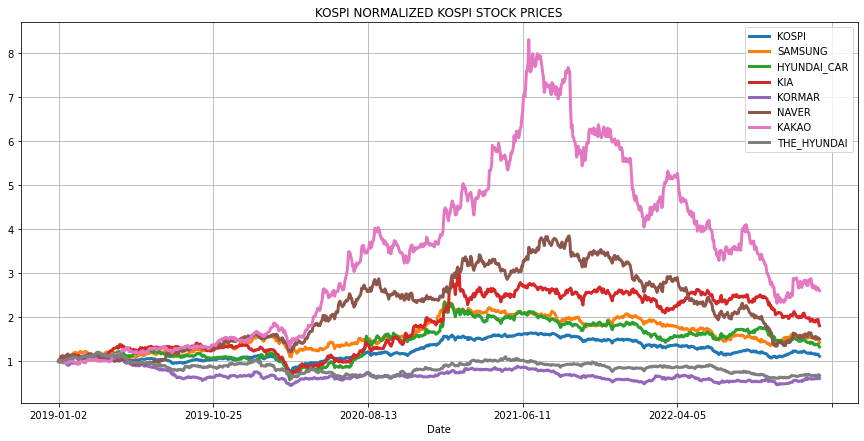

In [12]:
# 그래프 그려보기 
show_plot(df=normalize(kospi_df), fig_title="KOSPI NORMALIZED KOSPI STOCK PRICES")

In [13]:
# 코스닥 지수 - 정규화 
normalize(kosdaq_df)

Date    KOSDAQ  ECHOPRO_BM  HANA_METERIALS  SM_ENTER  JYP_ENTER  \
0    2019-03-06  1.000000    1.000000        1.000000  1.000000   1.000000   
1    2019-03-07  0.986782    1.018905        1.013661  0.956337   0.978333   
2    2019-03-08  0.985630    1.017487        0.991803  0.964856   1.003333   
3    2019-03-11  0.989808    1.007266        0.997268  0.863685   1.040000   
4    2019-03-12  1.010794    0.978141        1.038251  0.831736   0.998333   
..          ...       ...         ...             ...       ...        ...   
939  2022-12-23  0.925740    5.730490        1.808743  1.642173   2.230000   
940  2022-12-26  0.930333    5.748213        1.901639  1.684771   2.243333   
941  2022-12-27  0.943070    5.783659        1.904372  1.689031   2.273333   
942  2022-12-28  0.927240    5.446919        1.822404  1.618743   2.230000   
943  2022-12-29  0.909723    5.441011        1.786885  1.633653   2.260000   

     PERARLABYSS  SEOUL_SMC  
0       1.000000   1.000000  
1       1.014988   0.902240  
2       1.020983   0.898167  
3       1.092926   0.885947  
4       1.103717   0.906314  
..           ...        ...  
939     0.251199   0.443992  
940     0.260192   0.450102  
941     0.266187   0.452138  
942     0.257794   0.427699  
943     0.251499   0.411405  

[944 rows x 8 columns]

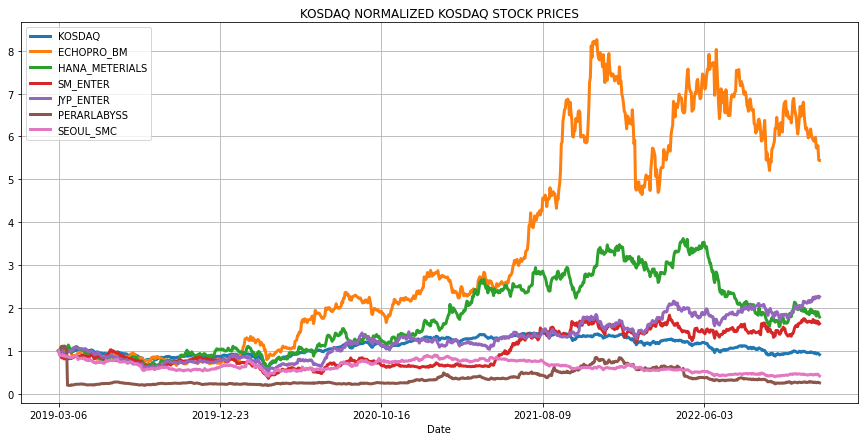

In [14]:
# 그래프 그려보기 
show_plot(df=normalize(kosdaq_df), fig_title="KOSDAQ NORMALIZED KOSDAQ STOCK PRICES")

### 자산 할당 
- 자산 할당이란 투자위험감수 즉 목표 수익율과 투자 기간을 기준으로 고객의 자산을 할당하는데 사용되는 투자 전략이다.
- 포트폴리오 매니저의 목표는 많은 수익과 리스크를 줄이는 것이다.
- 어떻게 자산을 할당할 수 있을까? 여러가지 방법이 있지만 대표적으로 아래의 방법으로 많이 분류한다.
    - 주식
    - 채권
    - 현금 등가물
    - ETF
    - 부동산
    - REIT(부동산 투자 신탁)

- 그럼 자산 할당은 어떻게 계산할까? 
- 예를들어 만약 우리가 1억원으로 투자할 수 있다고 가정해보자 
    1. 위의 열거한 모든 주요 주식에 대한 무작위로 비중을 지정한다. 
    2. 가지고 있는 1억원으로 코스피 기준 8개의 주식들에 대해 1억원을 나눈다. (이것들이 우리가 할당하려는 비중이 될 것이다.)
    3. 그럼 WEIGHTS 즉 가중치가 구성될 것이다.(해당 비중들을 무작위로 생성하기 위해 Numpy를 사용함.)

#### 여기서 잠깐, 만약 금융 설계사가 자산 할당, 특히 주식과 관련하여 현재 현역에서 일을하고 있는 청년들과 은퇴하신 몇몇 어르신들께 일반적으로 할 수 있는 조언은 무엇일까?
- 일반적으로 주식에 할당될 포트폴리오의 비율을 계산하기 위해 100에서 고객의 나이를 뺀다.
- 청년들에게 조언 
    - 만약 고객이 30살이라고 가정해보자. 먼저 100에서 30을 뺀다. 그럼 주식에 70%을 할당하게 된다. 
    - 여기서 중요한 점은 30살인 당신은 아직 시간이 많이 남아있기에 복리를 활용할 수 있고, 위험을 더 감수할 수 있다. 그래서 리스크가 있는 포트폴리오를 추천해줄 수 있다. 
- 은퇴한 어르신들에게 조언
    - 만약 고객이 70세라고 가정해보자. 먼저 100에서 70을 뺀다. 그럼 주식에 25%를 할당하게 된다. 은퇴한 모든 연장자들은 일반적으로 더 안정적이고 위험이 낮은 포트폴리오를 추천해줄 수 있다.

#### 자산할당 및 포트폴리오 일일 수익률 계산

In [30]:
# KOSPI

# step 1 무작위 비중 만들기 
# np.random.seed(101)
np.random.seed()

# step 2 만든 무작위 비중 계산(비중 생성)
my_weight = np.array(np.random.random(8))   # 8개의 난수를 행성

# step 3 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
my_weight = my_weight / np.sum(my_weight)
print(my_weight)

[0.14830701 0.03517485 0.00381655 0.19279634 0.20406701 0.13750825
 0.15449662 0.12383338]


- 코스피 지수를 포함안 주가 종목의 개수가 8개이므로 8개의 난수를 생성한다. 
- 그리고 모든 비중의 합이 1이 되도록 계산해준다. 
    - 생성한 난수 / 난수들의 합 

In [31]:
# step 4 정규화 시키기
kospi_portfolio = normalize(kospi_df)
kospi_portfolio

Date     KOSPI   SAMSUNG  HYUNDAI_CAR       KIA    KORMAR  \
0    2019-01-02  1.000000  1.000000     1.000000  1.000000  1.000000   
1    2019-01-03  0.991891  0.970323     1.021930  1.001524  0.994286   
2    2019-01-04  1.000124  0.966452     1.048246  1.062500  1.001429   
3    2019-01-07  1.013483  1.000000     1.057018  1.042683  1.012857   
4    2019-01-08  1.007597  0.983226     1.048246  1.030488  0.977143   
..          ...       ...       ...          ...       ...       ...   
980  2022-12-23  1.151090  1.499355     1.377193  1.911585  0.605714   
981  2022-12-26  1.152806  1.494194     1.385965  1.942073  0.598571   
982  2022-12-27  1.160592  1.499355     1.385965  1.954268  0.630000   
983  2022-12-28  1.134552  1.460645     1.350877  1.856707  0.617143   
984  2022-12-29  1.112637  1.427097     1.324561  1.807927  0.608571   

        NAVER     KAKAO  THE_HYUNDAI  
0    1.000000  1.000000     1.000000  
1    1.033898  1.004902     0.997719  
2    1.063559  1.014706     1.005701  
3    1.114407  1.009804     1.007982  
4    1.101695  0.979412     0.993158  
..        ...       ...          ...  
980  1.508475  2.617647     0.671608  
981  1.512712  2.627451     0.672748  
982  1.533898  2.666667     0.677309  
983  1.525424  2.627451     0.696693  
984  1.504237  2.602941     0.672748  

[985 rows x 9 columns]

In [32]:
# step 5 모든 열의 이름들의 목록 얻어내기 
kospi_portfolio.columns[1:]

Index(['KOSPI', 'SAMSUNG', 'HYUNDAI_CAR', 'KIA', 'KORMAR', 'NAVER', 'KAKAO',
       'THE_HYUNDAI'],
      dtype='object')

- 모든 종목들을 정규화 시켜준다. 
- 그리고 모든 열(종목) 목록을 만들어 준다.

In [33]:
# step 6 테이블 만들기 - enumerate함수 활용
for counter, stock in enumerate(kospi_portfolio.columns[1:]):
    # 보유한 주식의 값(정규화된) * 가중치 
    kospi_portfolio[stock] = kospi_portfolio[stock] * my_weight[counter]
    # 위에 계산한 가중치 * 1억원 - 100으로 표기 
    kospi_portfolio[stock] = kospi_portfolio[stock] * 100000000

# 초기 할당 테이블 결과 확인
kospi_portfolio

Date         KOSPI       SAMSUNG    HYUNDAI_CAR           KIA  \
0    2019-01-02  1.483070e+07  3.517485e+06  381654.639477  1.927963e+07   
1    2019-01-03  1.471043e+07  3.413095e+06  390024.258764  1.930902e+07   
2    2019-01-04  1.483255e+07  3.399479e+06  400067.801908  2.048461e+07   
3    2019-01-07  1.503066e+07  3.517485e+06  403415.649623  2.010255e+07   
4    2019-01-08  1.494337e+07  3.458482e+06  400067.801908  1.986743e+07   
..          ...           ...           ...            ...           ...   
980  2022-12-23  1.707146e+07  5.273958e+06  525612.091210  3.685467e+07   
981  2022-12-26  1.709692e+07  5.255804e+06  528959.938925  3.744246e+07   
982  2022-12-27  1.721239e+07  5.273958e+06  528959.938925  3.767758e+07   
983  2022-12-28  1.682620e+07  5.137798e+06  515568.548066  3.579664e+07   
984  2022-12-29  1.650118e+07  5.019792e+06  505525.004922  3.485617e+07   

           KORMAR         NAVER         KAKAO   THE_HYUNDAI  
0    2.040670e+07  1.375082e+07  1.544966e+07  1.238334e+07  
1    2.029009e+07  1.421695e+07  1.552540e+07  1.235510e+07  
2    2.043585e+07  1.462482e+07  1.567686e+07  1.245394e+07  
3    2.066907e+07  1.532401e+07  1.560113e+07  1.248218e+07  
4    1.994026e+07  1.514921e+07  1.513158e+07  1.229862e+07  
..            ...           ...           ...           ...  
980  1.236063e+07  2.074277e+07  4.044176e+07  8.316746e+06  
981  1.221487e+07  2.080104e+07  4.059323e+07  8.330866e+06  
982  1.285622e+07  2.109237e+07  4.119910e+07  8.387346e+06  
983  1.259385e+07  2.097583e+07  4.059323e+07  8.627388e+06  
984  1.241894e+07  2.068450e+07  4.021456e+07  8.330866e+06  

[985 rows x 9 columns]

In [34]:
# step 7 추가열 만들기 - step 6에서 계산한 모든 원화 값의 총합
kospi_portfolio["portfolio daily worth in ￦"] = kospi_portfolio[kospi_portfolio!="Date"].sum(axis=1)    # x축은 1과 같음(한마디로 더하는 기준을 가로열 지정)
kospi_portfolio

Date         KOSPI       SAMSUNG    HYUNDAI_CAR           KIA  \
0    2019-01-02  1.483070e+07  3.517485e+06  381654.639477  1.927963e+07   
1    2019-01-03  1.471043e+07  3.413095e+06  390024.258764  1.930902e+07   
2    2019-01-04  1.483255e+07  3.399479e+06  400067.801908  2.048461e+07   
3    2019-01-07  1.503066e+07  3.517485e+06  403415.649623  2.010255e+07   
4    2019-01-08  1.494337e+07  3.458482e+06  400067.801908  1.986743e+07   
..          ...           ...           ...            ...           ...   
980  2022-12-23  1.707146e+07  5.273958e+06  525612.091210  3.685467e+07   
981  2022-12-26  1.709692e+07  5.255804e+06  528959.938925  3.744246e+07   
982  2022-12-27  1.721239e+07  5.273958e+06  528959.938925  3.767758e+07   
983  2022-12-28  1.682620e+07  5.137798e+06  515568.548066  3.579664e+07   
984  2022-12-29  1.650118e+07  5.019792e+06  505525.004922  3.485617e+07   

           KORMAR         NAVER         KAKAO   THE_HYUNDAI  \
0    2.040670e+07  1.375082e+07  1.544966e+07  1.238334e+07   
1    2.029009e+07  1.421695e+07  1.552540e+07  1.235510e+07   
2    2.043585e+07  1.462482e+07  1.567686e+07  1.245394e+07   
3    2.066907e+07  1.532401e+07  1.560113e+07  1.248218e+07   
4    1.994026e+07  1.514921e+07  1.513158e+07  1.229862e+07   
..            ...           ...           ...           ...   
980  1.236063e+07  2.074277e+07  4.044176e+07  8.316746e+06   
981  1.221487e+07  2.080104e+07  4.059323e+07  8.330866e+06   
982  1.285622e+07  2.109237e+07  4.119910e+07  8.387346e+06   
983  1.259385e+07  2.097583e+07  4.059323e+07  8.627388e+06   
984  1.241894e+07  2.068450e+07  4.021456e+07  8.330866e+06   

     portfolio daily worth in ￦  
0                  1.000000e+08  
1                  1.002101e+08  
2                  1.023082e+08  
3                  1.031305e+08  
4                  1.011890e+08  
..                          ...  
980                1.415876e+08  
981                1.422641e+08  
982                1.442279e+08  
983                1.410665e+08  
984                1.385315e+08  

[985 rows x 10 columns]

In [35]:
# step 8 포트폴리오 일일 수익율 계산 컬럼 추가 

# 최초값 0 설정
kospi_portfolio["portfolio daily % return"] = 0.0000

# 일일 수익율 계산
for i in range(1, len(kospi_df)):
    # ((오늘 수익 - 어제자 수익) / 어제자 수익) * 100
    kospi_portfolio["portfolio daily % return"][i] = ((kospi_portfolio["portfolio daily worth in ￦"][i] - kospi_portfolio["portfolio daily worth in ￦"][i-1]) / kospi_portfolio["portfolio daily worth in ￦"][i-1]) * 100
    
kospi_portfolio

Date         KOSPI       SAMSUNG    HYUNDAI_CAR           KIA  \
0    2019-01-02  1.483070e+07  3.517485e+06  381654.639477  1.927963e+07   
1    2019-01-03  1.471043e+07  3.413095e+06  390024.258764  1.930902e+07   
2    2019-01-04  1.483255e+07  3.399479e+06  400067.801908  2.048461e+07   
3    2019-01-07  1.503066e+07  3.517485e+06  403415.649623  2.010255e+07   
4    2019-01-08  1.494337e+07  3.458482e+06  400067.801908  1.986743e+07   
..          ...           ...           ...            ...           ...   
980  2022-12-23  1.707146e+07  5.273958e+06  525612.091210  3.685467e+07   
981  2022-12-26  1.709692e+07  5.255804e+06  528959.938925  3.744246e+07   
982  2022-12-27  1.721239e+07  5.273958e+06  528959.938925  3.767758e+07   
983  2022-12-28  1.682620e+07  5.137798e+06  515568.548066  3.579664e+07   
984  2022-12-29  1.650118e+07  5.019792e+06  505525.004922  3.485617e+07   

           KORMAR         NAVER         KAKAO   THE_HYUNDAI  \
0    2.040670e+07  1.375082e+07  1.544966e+07  1.238334e+07   
1    2.029009e+07  1.421695e+07  1.552540e+07  1.235510e+07   
2    2.043585e+07  1.462482e+07  1.567686e+07  1.245394e+07   
3    2.066907e+07  1.532401e+07  1.560113e+07  1.248218e+07   
4    1.994026e+07  1.514921e+07  1.513158e+07  1.229862e+07   
..            ...           ...           ...           ...   
980  1.236063e+07  2.074277e+07  4.044176e+07  8.316746e+06   
981  1.221487e+07  2.080104e+07  4.059323e+07  8.330866e+06   
982  1.285622e+07  2.109237e+07  4.119910e+07  8.387346e+06   
983  1.259385e+07  2.097583e+07  4.059323e+07  8.627388e+06   
984  1.241894e+07  2.068450e+07  4.021456e+07  8.330866e+06   

     portfolio daily worth in ￦  portfolio daily % return  
0                  1.000000e+08                  0.000000  
1                  1.002101e+08                  0.210114  
2                  1.023082e+08                  2.093663  
3                  1.031305e+08                  0.803768  
4                  1.011890e+08                 -1.882542  
..                          ...                       ...  
980                1.415876e+08                 -2.190753  
981                1.422641e+08                  0.477820  
982                1.442279e+08                  1.380375  
983                1.410665e+08                 -2.191956  
984                1.385315e+08                 -1.797008  

[985 rows x 11 columns]

- 2022-12-29일 맨 끝에 수익 원화가 가장 높게 나오는 것을 지정하기 위해 총 3번의 가중치 난수를 생성
    - 코스피 포트폴리오 value run 1 - `￦100,000,000(1억)`에서 시작
        - 첫 번째 가중치: [0.14348372 0.15409548 0.00379953 0.18870695 0.12357667 0.18563464, 0.10130812 0.09939489]
        - 1억원 에서 시작해서 `￦141,096,600`원 을 벌게 됨
    - 코스피 포트폴리오 value run 2 - `￦100,000,000(1억)`에서 시작
        - 두 번째 가중치: [0.07571974 0.17624709 0.01084941 0.01267196 0.2365502  0.18349889, 0.13518486 0.16927785]
        - 1억원 에서 시작해서 `￦125,879,400`원 을 벌게 됨
    - 코스피 포트폴리오 value run 3 - `￦100,000,000(1억)`에서 시작
        - 세 번째 가중치: [0.14830701 0.03517485 0.00381655 0.19279634 0.20406701 0.13750825, 0.15449662 0.12383338]
        - 1억원 에서 시작해서 `￦138,531,500`원을 벌게 됨

- 이렇게 가중치를 대입하는 것은 자산 배분 전략 중 하나이며, 이런 방식을 일정한 가중치 자산 배분이라고 한다.
- 위에서 잠깐 언급 했지만 포트폴리오 매니저의 목표는 많은 수익과 리스크를 줄이는 것이므로 여럿 가중치를 대입해서 자산 배분을 한다. 
- 여기서는 첫 번째 방식으로 자산을 배분하면 2년만에 약 4천만원의 수익을 낼 수 있다.

In [17]:
# 위의 과정을 대입하여 함수화 
# 투자할 금액이 ￦100,000,000(1억원) 이고 주식의 가중치에 따라 이 자금을 할당한다고 가정함.
# 가중치와 함께 주가를 가져와 반환하는 함수 만들기 
#    1. 원화가 가치로된 개별 주식에 대한 일일 값 반환
#    2. 포트폴리오 전체의 일일 값 반환
#    3. 일일 수익율 반환 


# 포트폴리오 배분 - 일일 수익률 / 가치 계산 기능 
def portfolio_allocation(df, weights):
    df_portfolio = df.copy()                # 데이터프레임 카피
    df_portfolio = normalize(df_portfolio)  # 정규화 계산
    
    # 테이블 만들기 
    for counter, stock in enumerate(df_portfolio.columns[1:]):
        # 보유한 주식의 값(정규화된) * 가중치 
        df_portfolio[stock] = df_portfolio[stock] * weights[counter]
        # 위에 계산한 가중치 * 1억원 - 100으로 표기 
        df_portfolio[stock] = df_portfolio[stock] * 100000000
    
    # 모든 원화 값의 총합 계산 및 컬럼 생성
    df_portfolio["portfolio daily worth in ￦"] = df_portfolio[df_portfolio!="Date"].sum(axis=1)    # x축은 1과 같음(한마디로 더하는 기준을 가로열 지정)
    
    # 최초값 0 설정
    df_portfolio["portfolio daily % return"] = 0.0000

    # 일일 수익율 계산
    for i in range(1, len(df)):
        # ((오늘 수익 - 어제자 수익) / 어제자 수익) * 100
        df_portfolio["portfolio daily % return"][i] = ((df_portfolio["portfolio daily worth in ￦"][i] - df_portfolio["portfolio daily worth in ￦"][i-1]) / df_portfolio["portfolio daily worth in ￦"][i-1]) * 100
    
    # 첫 번째 raw에 최초 값인 0 추가 
    df_portfolio["portfolio daily % return"][0] = 0
    
    return df_portfolio

In [54]:
# KOSDAQ 

# 무작위 비중 만들기 
np.random.seed()

# 만든 무작위 비중 계산(비중 생성)
my_weight = np.array(np.random.random(7))   # 7 개의 난수를 행성

# 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
my_weight = my_weight / np.sum(my_weight)
print(my_weight)

# 함수 사용하여 자산 분할 및 일일 수익율 계산
result = portfolio_allocation(kosdaq_df, my_weight)
result

[0.18390452 0.05102879 0.27442456 0.17215485 0.03875211 0.21594925
 0.06378592]


Date        KOSDAQ    ECHOPRO_BM  HANA_METERIALS      SM_ENTER  \
0    2019-03-06  1.839045e+07  5.102879e+06    2.744246e+07  1.721548e+07   
1    2019-03-07  1.814736e+07  5.199348e+06    2.781735e+07  1.646380e+07   
2    2019-03-08  1.812618e+07  5.192113e+06    2.721752e+07  1.661047e+07   
3    2019-03-11  1.820303e+07  5.139959e+06    2.736748e+07  1.486875e+07   
4    2019-03-12  1.858896e+07  4.991338e+06    2.849217e+07  1.431874e+07   
..          ...           ...           ...             ...           ...   
939  2022-12-23  1.702478e+07  2.924200e+07    4.963635e+07  2.827080e+07   
940  2022-12-26  1.710925e+07  2.933244e+07    5.218565e+07  2.900415e+07   
941  2022-12-27  1.734347e+07  2.951332e+07    5.226063e+07  2.907749e+07   
942  2022-12-28  1.705236e+07  2.779497e+07    5.001125e+07  2.786745e+07   
943  2022-12-29  1.673021e+07  2.776482e+07    4.903652e+07  2.812413e+07   

        JYP_ENTER   PERARLABYSS     SEOUL_SMC  portfolio daily worth in ￦  \
0    3.875211e+06  2.159493e+07  6.378592e+06                1.000000e+08   
1    3.791248e+06  2.191859e+07  5.755022e+06                9.909272e+07   
2    3.888128e+06  2.204806e+07  5.729040e+06                9.881151e+07   
3    4.030219e+06  2.360165e+07  5.651094e+06                9.886218e+07   
4    3.868752e+06  2.383469e+07  5.781005e+06                9.987565e+07   
..            ...           ...           ...                         ...   
939  8.641720e+06  5.424625e+06  2.832043e+06                1.410723e+08   
940  8.693389e+06  5.618824e+06  2.871016e+06                1.448147e+08   
941  8.809645e+06  5.748289e+06  2.884007e+06                1.456369e+08   
942  8.641720e+06  5.567037e+06  2.728115e+06                1.396629e+08   
943  8.757976e+06  5.431098e+06  2.624186e+06                1.384689e+08   

     portfolio daily % return  
0                    0.000000  
1                   -0.907277  
2                   -0.283791  
3                    0.051278  
4                    1.025136  
..                        ...  
939                 -4.264174  
940                  2.652832  
941                  0.567710  
942                 -4.101946  
943                 -0.854889  

[944 rows x 10 columns]

- 2022-12-29일 맨 끝에 수익 원화가 가장 높게 나오는 것을 지정하기 위해 총 3번의 가중치 난수를 생성
    - 코스닥 포트폴리오 value run 1 - `￦100,000,000(1억)`에서 시작
        - 첫 번째 가중치: [0.20540531 0.09561158 0.12118605 0.09878872 0.22037087 0.05978249 0.19885499]
        - 1억원 에서 시작해서 `￦167,990,100원` 을 벌게 됨
    - 코스닥 포트폴리오 value run 2 - `￦100,000,000(1억)`에서 시작
        - 두 번째 가중치: [0.16374654 0.12631278 0.17262333 0.17116133 0.14971882 0.08206782 0.1343694]
        - 1억원 에서 시작해서 `￦183,859,400원` 을 벌게 됨
    - 코스닥 포트폴리오 value run 3 - `￦100,000,000(1억)`에서 시작
        - 세 번째 가중치: [0.18390452 0.05102879 0.27442456 0.17215485 0.03875211 0.21594925 0.06378592]
        - 1억원 에서 시작해서 `￦138,468,900원`을 벌게 됨
- 여기서는 두 번째 방식으로 자산을 배분하면 2년만에 약 8천만원의 수익을 낼 수 있다.

#### 포트폴리오 자산 배분 비주얼라이제이션

In [19]:
# 자산 배분 - 코스피 데이터

# 무작위 비중 만들기 
np.random.seed(101)

# 만든 무작위 비중 계산(비중 생성)
weights = np.array(np.random.random(9))   # 9개의 난수를 행성

# 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
weights = weights / np.sum(weights)

# 위에 설정한 함수를 사용 
kospi_result = portfolio_allocation(kospi_df, weights)
kospi_result

Date         KOSPI       SAMSUNG    HYUNDAI_CAR           KIA  \
0    2019-01-02  1.092131e+07  1.206904e+07  602201.014336  3.627509e+06   
1    2019-01-03  1.083274e+07  1.171086e+07  615407.176931  3.633039e+06   
2    2019-01-04  1.092267e+07  1.166414e+07  631254.572045  3.854228e+06   
3    2019-01-07  1.106855e+07  1.206904e+07  636537.037083  3.782342e+06   
4    2019-01-08  1.100428e+07  1.186659e+07  631254.572045  3.738104e+06   
..          ...           ...           ...            ...           ...   
980  2022-12-23  1.257140e+07  1.809577e+07  829347.010972  6.934293e+06   
981  2022-12-26  1.259015e+07  1.803348e+07  834629.476010  7.044888e+06   
982  2022-12-27  1.267518e+07  1.809577e+07  834629.476010  7.089126e+06   
983  2022-12-28  1.239079e+07  1.762859e+07  813499.615857  6.735223e+06   
984  2022-12-29  1.215145e+07  1.722369e+07  797652.220743  6.558271e+06   

           KORMAR         NAVER         KAKAO   THE_HYUNDAI  \
0    1.449291e+07  1.763607e+07  6.492024e+06  1.889901e+07   
1    1.441010e+07  1.823391e+07  6.523848e+06  1.885591e+07   
2    1.451362e+07  1.875701e+07  6.587495e+06  1.900676e+07   
3    1.467925e+07  1.965376e+07  6.555672e+06  1.904986e+07   
4    1.416165e+07  1.942957e+07  6.358365e+06  1.876971e+07   
..            ...           ...           ...           ...   
980  8.778565e+06  2.660357e+07  1.699383e+07  1.269272e+07   
981  8.675044e+06  2.667830e+07  1.705748e+07  1.271427e+07   
982  9.130535e+06  2.705194e+07  1.731206e+07  1.280047e+07   
983  8.944198e+06  2.690248e+07  1.705748e+07  1.316681e+07   
984  8.819973e+06  2.652884e+07  1.689836e+07  1.271427e+07   

     portfolio daily worth in ￦  portfolio daily % return  
0                  8.474008e+07                  0.000000  
1                  8.481581e+07                  0.089371  
2                  8.593717e+07                  1.322114  
3                  8.749501e+07                  1.812766  
4                  8.595952e+07                 -1.754946  
..                          ...                       ...  
980                1.034995e+08                 -2.315515  
981                1.036282e+08                  0.124383  
982                1.049897e+08                  1.313820  
983                1.036391e+08                 -1.286461  
984                1.016925e+08                 -1.878222  

[985 rows x 11 columns]

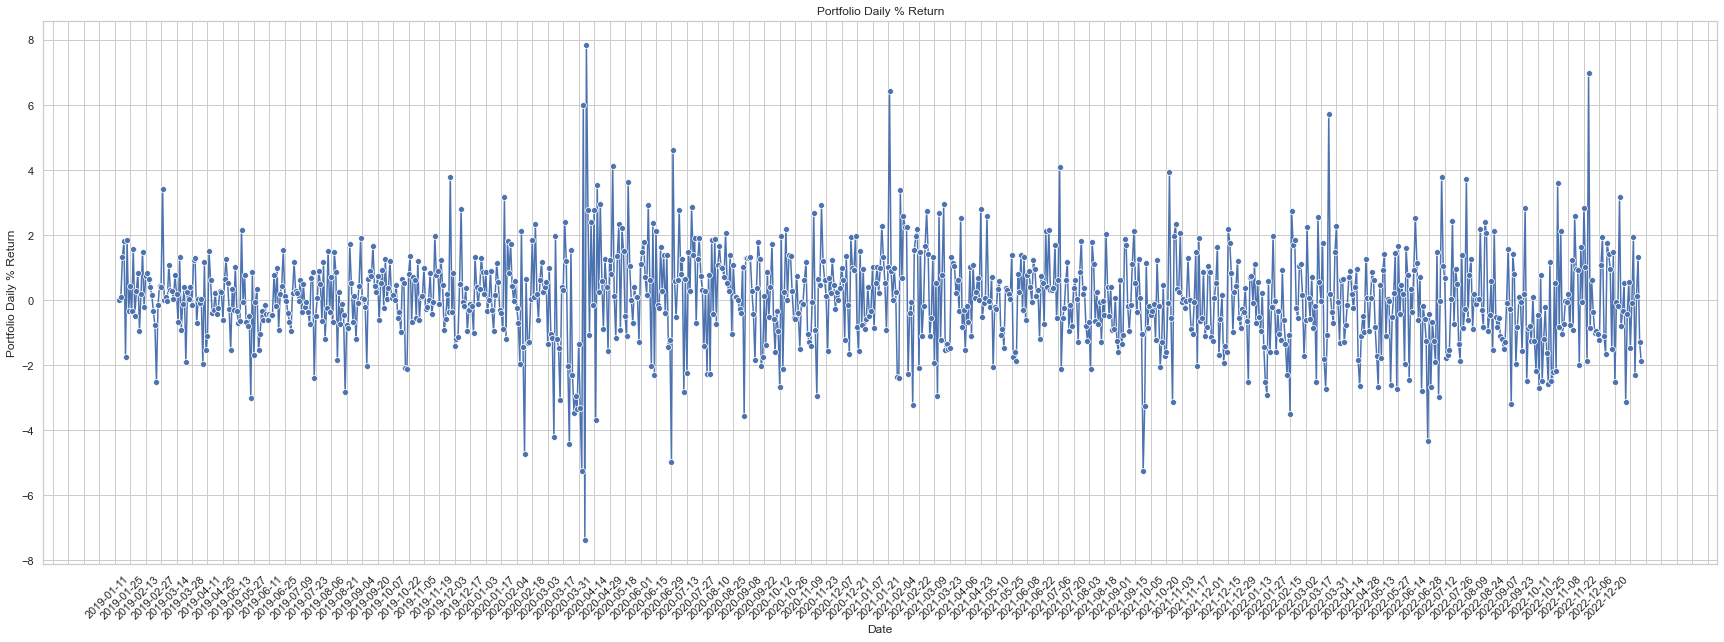

In [30]:
# kospi 일일 수익율 그래프화
sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))

# Plot the line
sns.lineplot(x="Date", y="portfolio daily % return", data=kospi_result, marker='o', color='b')

# Set title and labels
plt.title("Portfolio Daily % Return")
plt.xlabel("Date")
plt.ylabel("Portfolio Daily % Return")

n = 10  # Show every 7th label (adjust as needed)
locator = mdates.DayLocator(interval=n)
plt.gca().xaxis.set_major_locator(locator)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

- 무작위 자산 배분율을 기준으로 일일 포트폴리오 수익률을 그래프로 나타냄 
- 그래프에도 나타나듯이 코스피의 경우 2020년 3월이 수익과 손해 비율이 컸고, 더 나아가 2022년 12월은 두번째로 손익 비율이 크지만 사실상 수익 비율이 높은 것으로 나타냄 

In [31]:
# 자산 배분 - 코스닥 데이터

# 무작위 비중 만들기 
np.random.seed(101)

# 만든 무작위 비중 계산(비중 생성)
weights = np.array(np.random.random(9))   # 9개의 난수를 행성

# 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
weights = weights / np.sum(weights)

# 위에 설정한 함수를 사용 
kosdaq_result = portfolio_allocation(kosdaq_df, weights)
kosdaq_result

Date        KOSDAQ    ECHOPRO_BM  HANA_METERIALS      SM_ENTER  \
0    2019-03-06  1.092131e+07  1.206904e+07    6.022010e+05  3.627509e+06   
1    2019-03-07  1.077695e+07  1.229720e+07    6.104278e+05  3.469119e+06   
2    2019-03-08  1.076437e+07  1.228009e+07    5.972649e+05  3.500025e+06   
3    2019-03-11  1.081000e+07  1.215674e+07    6.005557e+05  3.133024e+06   
4    2019-03-12  1.103919e+07  1.180523e+07    6.252360e+05  3.017129e+06   
..          ...           ...           ...             ...           ...   
939  2022-12-23  1.011029e+07  6.916151e+07    1.089227e+06  5.956996e+06   
940  2022-12-26  1.016046e+07  6.937542e+07    1.145169e+06  6.111522e+06   
941  2022-12-27  1.029955e+07  6.980322e+07    1.146814e+06  6.126975e+06   
942  2022-12-28  1.012667e+07  6.573909e+07    1.097454e+06  5.872006e+06   
943  2022-12-29  9.935362e+06  6.566779e+07    1.076064e+06  5.926090e+06   

        JYP_ENTER   PERARLABYSS     SEOUL_SMC  portfolio daily worth in ￦  \
0    1.449291e+07  1.763607e+07  6.492024e+06                6.584107e+07   
1    1.417890e+07  1.790040e+07  5.857366e+06                6.509037e+07   
2    1.454122e+07  1.800613e+07  5.830922e+06                6.552003e+07   
3    1.507263e+07  1.927492e+07  5.751590e+06                6.679946e+07   
4    1.446876e+07  1.946523e+07  5.883810e+06                6.630459e+07   
..            ...           ...           ...                         ...   
939  3.231920e+07  4.430165e+06  2.882406e+06                1.259498e+08   
940  3.251244e+07  4.588762e+06  2.922072e+06                1.268158e+08   
941  3.294722e+07  4.694494e+06  2.935294e+06                1.279536e+08   
942  3.231920e+07  4.546470e+06  2.776630e+06                1.224775e+08   
943  3.275398e+07  4.435451e+06  2.670853e+06                1.224656e+08   

     portfolio daily % return  
0                    0.000000  
1                   -1.140173  
2                    0.660101  
3                    1.952732  
4                   -0.740827  
..                        ...  
939                 -3.392804  
940                  0.687608  
941                  0.897157  
942                 -4.279721  
943                 -0.009735  

[944 rows x 10 columns]

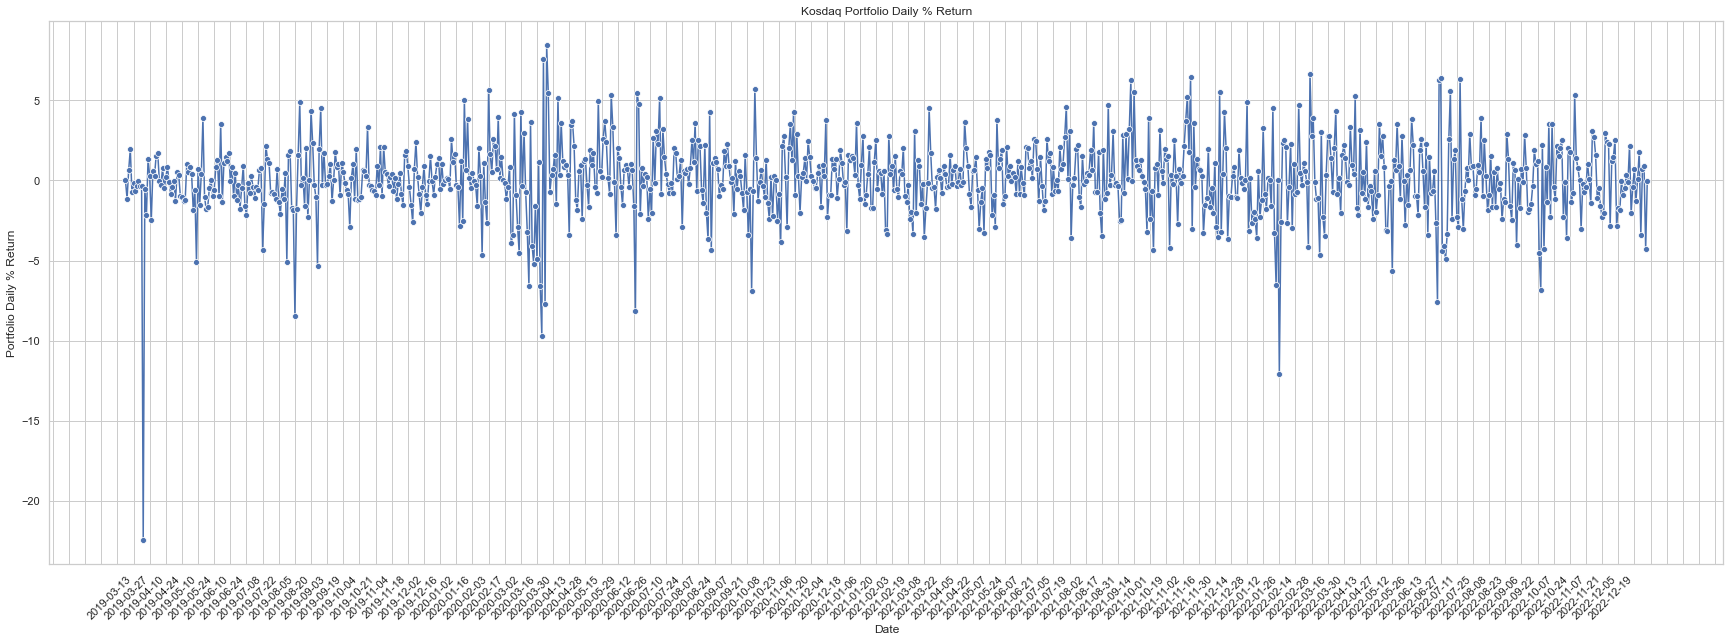

In [32]:
# kosdaq 일일 수익율 그래프화
sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))

# Plot the line
sns.lineplot(x="Date", y="portfolio daily % return", data=kosdaq_result, marker='o', color='b')

# Set title and labels
plt.title("Kosdaq Portfolio Daily % Return")
plt.xlabel("Date")
plt.ylabel("Portfolio Daily % Return")

n = 10  # Show every 7th label (adjust as needed)
locator = mdates.DayLocator(interval=n)
plt.gca().xaxis.set_major_locator(locator)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

- 코스닥의 경우 손익이 굉장히 드라마틱하다. -20%도 있고, 7%도 있고... 

In [39]:
# 정규화 후 
kospi_portfolio = normalize(kospi_df)

# 무작위 비중 만들기 
np.random.seed(101)

# 만든 무작위 비중 계산(비중 생성)
weights = np.array(np.random.random(9))   # 9개의 난수를 행성

# 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
weights = weights / np.sum(weights)

# 위에 설정한 함수를 사용 
kospi_result = portfolio_allocation(kospi_portfolio, weights)
kospi_result

Date         KOSPI       SAMSUNG    HYUNDAI_CAR           KIA  \
0    2019-01-02  1.092131e+07  1.206904e+07  602201.014336  3.627509e+06   
1    2019-01-03  1.083274e+07  1.171086e+07  615407.176931  3.633039e+06   
2    2019-01-04  1.092267e+07  1.166414e+07  631254.572045  3.854228e+06   
3    2019-01-07  1.106855e+07  1.206904e+07  636537.037083  3.782342e+06   
4    2019-01-08  1.100428e+07  1.186659e+07  631254.572045  3.738104e+06   
..          ...           ...           ...            ...           ...   
980  2022-12-23  1.257140e+07  1.809577e+07  829347.010972  6.934293e+06   
981  2022-12-26  1.259015e+07  1.803348e+07  834629.476010  7.044888e+06   
982  2022-12-27  1.267518e+07  1.809577e+07  834629.476010  7.089126e+06   
983  2022-12-28  1.239079e+07  1.762859e+07  813499.615857  6.735223e+06   
984  2022-12-29  1.215145e+07  1.722369e+07  797652.220743  6.558271e+06   

           KORMAR         NAVER         KAKAO   THE_HYUNDAI  \
0    1.449291e+07  1.763607e+07  6.492024e+06  1.889901e+07   
1    1.441010e+07  1.823391e+07  6.523848e+06  1.885591e+07   
2    1.451362e+07  1.875701e+07  6.587495e+06  1.900676e+07   
3    1.467925e+07  1.965376e+07  6.555672e+06  1.904986e+07   
4    1.416165e+07  1.942957e+07  6.358365e+06  1.876971e+07   
..            ...           ...           ...           ...   
980  8.778565e+06  2.660357e+07  1.699383e+07  1.269272e+07   
981  8.675044e+06  2.667830e+07  1.705748e+07  1.271427e+07   
982  9.130535e+06  2.705194e+07  1.731206e+07  1.280047e+07   
983  8.944198e+06  2.690248e+07  1.705748e+07  1.316681e+07   
984  8.819973e+06  2.652884e+07  1.689836e+07  1.271427e+07   

     portfolio daily worth in ￦  portfolio daily % return  
0                  8.474008e+07                  0.000000  
1                  8.481581e+07                  0.089371  
2                  8.593717e+07                  1.322114  
3                  8.749501e+07                  1.812766  
4                  8.595952e+07                 -1.754946  
..                          ...                       ...  
980                1.034995e+08                 -2.315515  
981                1.036282e+08                  0.124383  
982                1.049897e+08                  1.313820  
983                1.036391e+08                 -1.286461  
984                1.016925e+08                 -1.878222  

[985 rows x 11 columns]